# Goal:

Provide exploratory data analysis and visualization for tourist visitors to Brazil.

#### Answer the following questions:
- Number of people who visited the country = 108889535.0
- Worldwide inflow of visitors
- Monthly distribution of visitors 

#### Describe algorithms used in your process and/or commented R code.

- Please provide at least one visualization plot such as:
- Count of visitors by origin. 
- count of visitors by transport. 

In [2]:
# Imports

import pandas as pd
import numpy as np
% matplotlib inline

In [3]:
df = pd.read_excel('http://dattatele.github.io/url_data/data/Date_brazil.xlsx', index_col='Date')
df.head()

,Continent,Country,State,WayIn,Year,Month,Count
Date,,,,,,,
Jan-1989,Africa,South Africa,Amazonas,Air,1989,1,9.0
Jan-1989,Africa,Angola,Amazonas,Air,1989,1,0.0
Jan-1989,Africa,Nigeria,Amazonas,Air,1989,1,0.0
Jan-1989,Africa,Other countries,Amazonas,Air,1989,1,0.0
Jan-1989,Central America and Caribbean,Costa Rica,Amazonas,Air,1989,1,6.0


#### Total Number of people visited to Brazil from 1989 to 2015

In [4]:
df["Count"].sum()

108889535.0

#### Worldwide inflow of visitors

- Country-wise

In [6]:
# For one country 

country_df = df.loc[df['Country'] ==  'Argentina', "Count"]

In [8]:
country_df.head(10)

Date
Jan-1989     6.0
Feb-1989     7.0
Mar-1989     0.0
Apr-1989     0.0
May-1989     0.0
Jun-1989     4.0
Jul-1989     1.0
Aug-1989     3.0
Sep-1989    10.0
Oct-1989     4.0
Name: Count, dtype: float64

#### Repetition of month and Sum of count

In [9]:
country_df = country_df.groupby(country_df.index, sort=False).sum()

In [10]:
country_df.head(10)

Date
Jan-1989    175336.0
Feb-1989    103723.0
Mar-1989     34526.0
Apr-1989     15671.0
May-1989      7885.0
Jun-1989      8128.0
Jul-1989     15187.0
Aug-1989     10196.0
Sep-1989      9692.0
Oct-1989     19858.0
Name: Count, dtype: float64

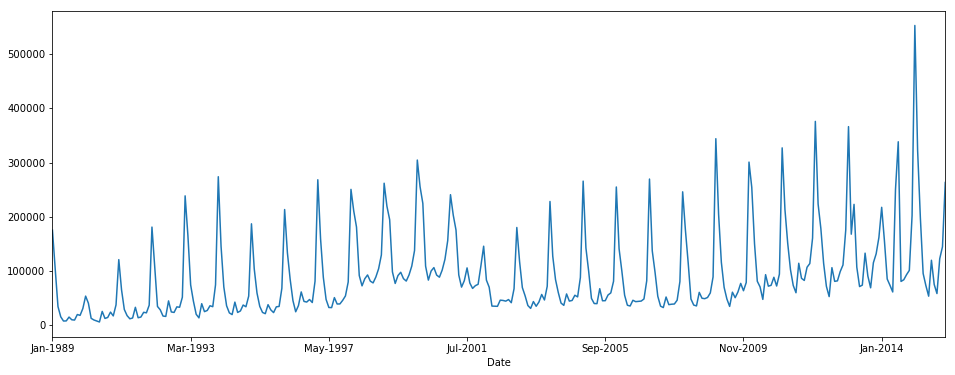

In [15]:
country_df.plot(figsize=(16, 6))



- #### Monthly Distribution


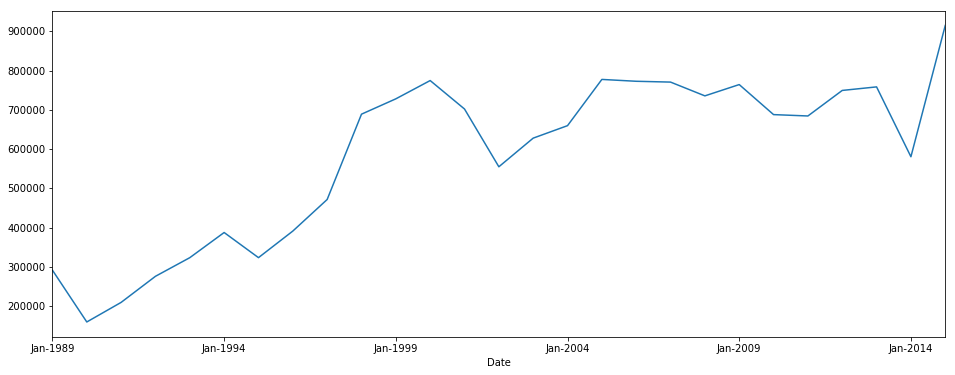

In [19]:
# For one month

month_df = df.loc[df['Month'] == 1, "Count"]
month_df = month_df.groupby(month_df.index, sort=False).sum()
month_df.plot(figsize=(16,6))


- #### WayIn (Mode of Transportation distribution)

In [21]:
# Country-wise distribution of transport

Air = df.loc[(df['Country'] == "Angola") & (df["WayIn"] == "Air")]

In [22]:
Air.head()

,Continent,Country,State,WayIn,Year,Month,Count
Date,,,,,,,
Jan-1989,Africa,Angola,Amazonas,Air,1989,1,0.0
Feb-1989,Africa,Angola,Amazonas,Air,1989,2,0.0
Mar-1989,Africa,Angola,Amazonas,Air,1989,3,0.0
Apr-1989,Africa,Angola,Amazonas,Air,1989,4,0.0
May-1989,Africa,Angola,Amazonas,Air,1989,5,0.0


In [23]:
AirIn = Air.loc[Air['WayIn'] == 'Air', "Count"]

In [26]:
AirIn.head(15)

Date
Jan-1989    0.0
Feb-1989    0.0
Mar-1989    0.0
Apr-1989    0.0
May-1989    0.0
Jun-1989    0.0
Jul-1989    0.0
Aug-1989    0.0
Sep-1989    0.0
Oct-1989    0.0
Nov-1989    0.0
Dec-1989    2.0
Jan-1989    0.0
Feb-1989    0.0
Mar-1989    1.0
Name: Count, dtype: float64

#### Months are repeating and needs aggregate sum

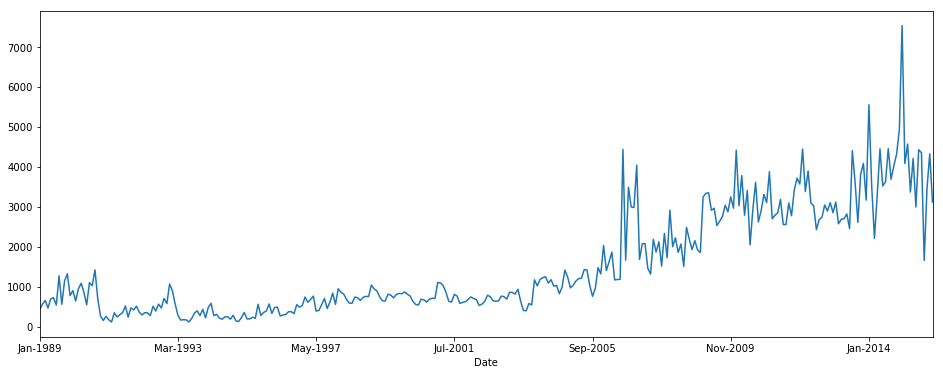

In [30]:
AirIn = AirIn.groupby(AirIn.index, sort=False).sum()
AirIn.plot(figsize = (16,6))


#### Similarly, for Land, RIver and Sea


Lets Find,

Total number of distribution in Air, Land, Rive and Sea 


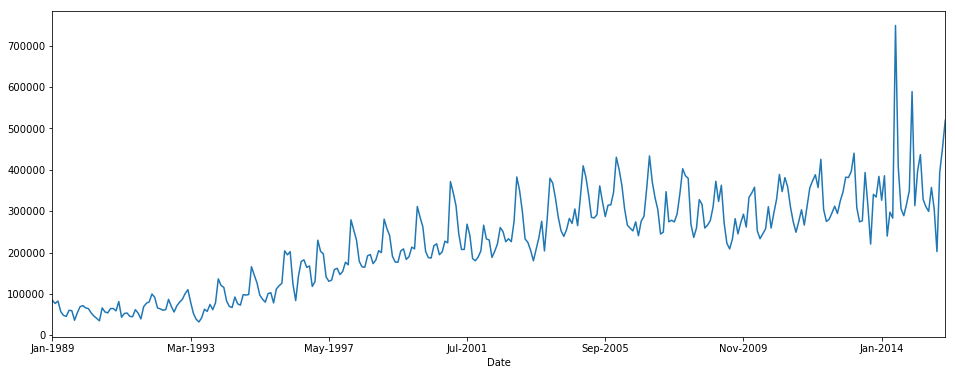

In [34]:
air_df = df.loc[df['WayIn'] == 'Air', "Count"]
Total_air = air_df.groupby(air_df.index, sort=False).sum()
Total_air.plot(figsize=(16,6))

In [35]:
Total_air.sum()

73065622.0

In [43]:
#Similary,

LandIn = df.loc[df['WayIn'] == 'Land', "Count"]
Total_land = LandIn.groupby(LandIn.index, sort=False).sum()
Total_land.sum()

33128703.0

In [39]:
RiverIn = df.loc[df['WayIn'] == 'River', "Count"]
Total_river = RiverIn.groupby(RiverIn.index, sort=False).sum()
Total_river.sum()

916938.0

In [40]:
SeaIn = df.loc[df['WayIn'] == 'Sea', "Count"]
Total_sea = SeaIn.groupby(SeaIn.index, sort=False).sum()
Total_sea.sum()

1778272.0

In [45]:
total_Sum  =  Total_air.sum() + Total_land.sum() + Total_river.sum() + Total_sea.sum()
total_Sum

108889535.0

#### % Percentage distribution

In [46]:
Air = Total_air.sum() / total_Sum
Air*100

67.10068327502731

In [47]:
Land = Total_land.sum() / total_Sum 
Land*100

30.42413855472888

In [48]:
River = Total_river.sum() / total_Sum 
River*100

0.8420809217341226

In [49]:
Sea = Total_sea.sum() / total_Sum 
Sea*100

1.6330972485096937

#### Chorolepath map of visitors to Brazil

In [51]:
import folium
import pandas as pd
import numpy as np

country_geo = r'countries.json'
country = r'country_code_count.csv'

country_data = pd.read_csv(country)

threshold_scale = np.linspace(country_data['Count'].min(),
                               country_data['Count'].max(), 6, dtype=int).tolist()

#Let Folium determine the scale
map = folium.Map(location=[33.400730, -16.114068], zoom_start=2)
map.choropleth(geo_data=country_geo, data=country_data,
             columns=['Country Code', 'Count'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Visitors to brazil", highlight=True, name = country_data["Count"], reset=True, threshold_scale=threshold_scale)


map

In [52]:
country_data

,Country,Country Code,Count
0,Angola,AGO,499466
1,Argentina,ARG,29572378
2,Australia,AUS,615716
3,Austria,AUT,509014
4,Belgium,BEL,619829
5,Bolivia,BOL,1924237
6,Canada,CAN,1292577
7,Cape Verde,CPV,50562
8,Chile,CHL,4076757
9,China,CHN,633080
